In [4]:
#install and import packages and modules
# pip install soccerplots (to install soccerplot library)

import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

### data source is FBREF.com. Data was cleaned, sorted and arranged on google spreadsheet

In [112]:
# read csv file
df = pd.read_csv('nunez vs haaland - Sheet1.csv')

In [113]:
#view dataframe
df

,Player,Age,90s,Goals,Shots,Shots On Target,SoT%,Shot/90,SoT/90,Goals/Sh,Goals/SoT,Dist,PK,PKatt
0,Darwin Nunez,22,22.0,26,85,44,51.8,3.87,2.00,0.26,0.50,NaN,4,4
1,Erling Haaland,21,21.2,22,74,31,41.9,3.49,1.46,0.22,0.52,13.5,6,6


In [114]:
# drop tables with NaN values to avoid errors when we plot
df = df.drop(['Dist'],axis=1)

In [115]:
#view data types
df.dtypes

Player              object
Age                  int64
90s                float64
Goals                int64
Shots                int64
Shots On Target      int64
SoT%               float64
Shot/90            float64
SoT/90             float64
Goals/Sh           float64
Goals/SoT          float64
PK                   int64
PKatt                int64
dtype: object

In [116]:
# get parameters
params = list(df.columns)

In [117]:
params

['Player',
 'Age',
 '90s',
 'Goals',
 'Shots',
 'Shots On Target',
 'SoT%',
 'Shot/90',
 'SoT/90',
 'Goals/Sh',
 'Goals/SoT',
 'PK',
 'PKatt']

In [118]:
# select only parameters we will plot
params = params[3:]
params

['Goals',
 'Shots',
 'Shots On Target',
 'SoT%',
 'Shot/90',
 'SoT/90',
 'Goals/Sh',
 'Goals/SoT',
 'PK',
 'PKatt']

In [119]:
# add ranges to list of turple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Darwin Nunez':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Erling Haaland':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[3:]
b_values = b_values[3:]

values = [a_values, b_values]

In [120]:
values

[[26, 85, 44, 51.8, 3.87, 2.0, 0.26, 0.5, 4, 4],
 [22, 74, 31, 41.9, 3.49, 1.46, 0.22, 0.52, 6, 6]]

In [121]:
# set titles and tags 

title = dict(
    title_name='Darwin Núñez',
    title_color = 'red',
    subtitle_name = 'S.L. Benfica',
    subtitle_color = 'red',
    title_name_2='Erling Haaland',
    title_color_2 = 'blue',
    subtitle_name_2 = 'Borussia Dortmund',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = 'created by:@ArinzeAtu\ndata via FBREF / Statsbomb'


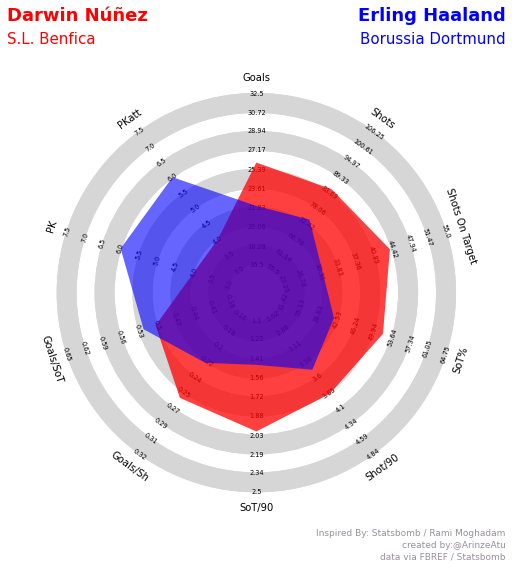

In [122]:
# Plot the chart
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)